#  1 - Importação de Dados e entendimento do problema - Youtube Analytics


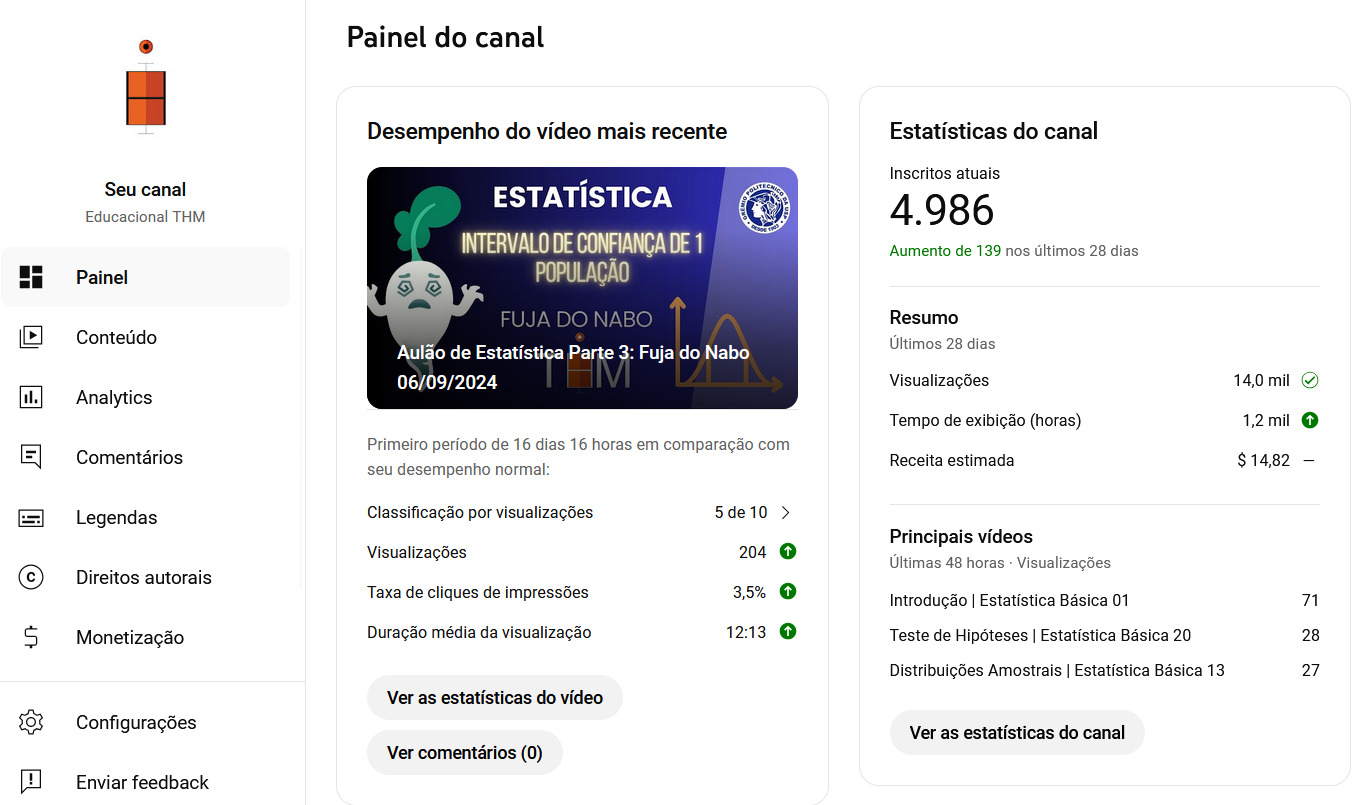

In [1]:
import pandas as pd
import numpy as np
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho do arquivo CSV no Google Drive
file_path = '/content/drive/My Drive/FIAP/Aulas/2024 2º Semestre/DS e Statistical Computing/Correlacao/dados_youtubeTHM.csv'

# Ler o arquivo CSV
df = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataframe importado
df.head()

Mounted at /content/drive


,Conteúdo,Título do vídeo,Horário de publicação do vídeo,"Marcações ""Gostei""",Inscrições obtidas,Porcentagem visualizada média (%),Duração média da visualização,Visualizações,Tempo de exibição (horas),Inscritos,Impressões
0,Total,NaN,NaN,19421,5475,26.90,0:04:51,358477,29063.6171,4987,4570652
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093


Primeira coisa a se fazer numa importação de dados:

**LIMPAR OS NOMES DAS COLUNAS**

In [3]:
# prompt: Me de um código que pega os nomes do df e troca para nomes menores, sem caracteres especiais e que tenham sentido com o problema

# Renomear as colunas
novos_nomes = {
    'Conteúdo':'conteudo',
    'Título do vídeo':'titulo',
    'Horário de publicação do vídeo':'data_publicacao',
    'Marcações "Gostei"':'curtidas',
    'Inscrições obtidas':'inscricoes',
    'Porcentagem visualizada média (%)':'porcent_media_visualizacao',
    'Duração média da visualização':'duracao_media_visualizacao',
    'Visualizações':'views',
    'Tempo de exibição (horas)':'tempo_exibicao_h',
    'Inscritos':'inscritos',
    'Impressões':'impressoes'
}

#df.rename(columns={'Estação': 'ponto'}, inplace=True)
df=df.rename(columns=novos_nomes)

Analisando o head dos dados, vemos que a primeira linha é de "totais", então devemos desconsiderá-la para nossa análise nesse momento.

In [4]:
# Podemos fazer isso de várias maneiras, nesse momento vamos filtrar as linhas cuja coluna "titulo" não seja vazia
df.head()

,conteudo,titulo,data_publicacao,curtidas,inscricoes,porcent_media_visualizacao,duracao_media_visualizacao,views,tempo_exibicao_h,inscritos,impressoes
0,Total,NaN,NaN,19421,5475,26.90,0:04:51,358477,29063.6171,4987,4570652
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093


In [5]:
# Podemos fazer essa operação de várias formas, uma delas é filtrar somente linhas que não apresentam vazios na coluna "titulo"
df = df[df['titulo'].notna()]
df.head()

,conteudo,titulo,data_publicacao,curtidas,inscricoes,porcent_media_visualizacao,duracao_media_visualizacao,views,tempo_exibicao_h,inscritos,impressoes
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093
5,uGexFqrNhw0,Introdução | Curso de Probabilidade 01,"Apr 16, 2021",584,331,17.91,0:02:23,11459,458.3918,330,47994


# 2 - Tipos de Dados

*   'Conteúdo' -> Nominal (códigos de vídeos)
*   'Título do vídeo' -> Nominal (nomes dos vídeos)
*   'Horário de publicação do vídeo' -> Está ordinal (datas de publicação)
*   'Marcações Gostei' -> Discreta (contagem de "Gostei")
*   'Inscrições obtidas' -> Discreta (contagem de inscrições)
*   'Porcentagem visualizada média' -> Contínua (valores percentuais)
*   'Duração média da visualização' -> Contínua (tempo de visualização)
*   'Visualizações' -> Discreta (contagem de visualizações)
*   'Tempo de exibição horas' -> Contínua (tempo total de exibição em horas)
*   'Inscritos' -> Discreta (contagem de inscritos)
*   'Impressões' -> Discreta (contagem de impressões)

# 3 - Análises Descritivas (a partir de perguntas com os dados)

Para simplificar a análise (normalmente é o que se faz), podemos escolher algumas colunas de interesse.
No caso vamos de curtidas, views, inscritos e tempo de exibição.

In [6]:
df_filtrado = df[['titulo','curtidas','inscritos','views','tempo_exibicao_h']]
df_filtrado.head()

,titulo,curtidas,inscritos,views,tempo_exibicao_h
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918


Vamos então à medidas descritivas iniciais para as colunas de interesse que selecionamos.

In [103]:
# Definindo a função para calcular a amplitude
def amplitude(x):
    return (x.max() - x.min())

# Definindo a função para calcular o coeficiente de variação
def coeficiente_variacao(x):
    return 100*(x.std() / x.mean())

def desvio_medio(x):
  return abs(x-x.mean()).mean()

def q1(x):
  return x.quantile(0.25)

def q3(x):
  return x.quantile(0.75)

# Usando aggregate para calcular as estatísticas
result = df.aggregate({
    'curtidas': ['count', 'mean','std','min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
    'inscritos': ['count', 'mean', 'std', 'min',q1, 'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
    'views': ['count', 'mean', 'std', 'min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
    'tempo_exibicao_h': ['count', 'mean','std', 'min',q1,'median', q3,'max', amplitude, coeficiente_variacao,desvio_medio],
})

print(result,'\n')
print('\n Resultados após arredondamento (só para exposição) \n')
result.round(0).transpose()

                         curtidas   inscritos         views  tempo_exibicao_h
count                  226.000000  226.000000    226.000000        226.000000
mean                    85.902655   16.858407   1585.977876        128.589766
std                    145.841129   65.041097   2769.370662        206.380224
min                      0.000000   -1.000000      4.000000          0.121800
q1                      11.000000    0.000000    185.250000          5.657900
median                  27.500000    3.000000    634.000000         43.101000
q3                     103.750000   12.750000   2025.250000        134.035300
max                   1268.000000  860.000000  28631.000000       1089.682600
amplitude             1268.000000  861.000000  28627.000000       1089.560800
coeficiente_variacao   169.774880  385.808082    174.615971        160.495062
desvio_medio            91.198449   21.357272   1575.553724        137.066461 


 Resultados após arredondamento (só para exposição) 



,count,mean,std,min,q1,median,q3,max,amplitude,coeficiente_variacao,desvio_medio
curtidas,226.0,86.0,146.0,0.0,11.0,28.0,104.0,1268.0,1268.0,170.0,91.0
inscritos,226.0,17.0,65.0,-1.0,0.0,3.0,13.0,860.0,861.0,386.0,21.0
views,226.0,1586.0,2769.0,4.0,185.0,634.0,2025.0,28631.0,28627.0,175.0,1576.0
tempo_exibicao_h,226.0,129.0,206.0,0.0,6.0,43.0,134.0,1090.0,1090.0,160.0,137.0


## Pontos que chamam atenção num primeiro momento:
*   Média e mediana muito distintas para todas as variáveis
*   Amplitudes grandes para todas também

Dá a entender que temos muitos outliers no conjunto de dados.

Adaptado à linguagem do problema: outliers superiores (valores altos anômalos) são vídeos virais!

Vamos representar graficamente os dados para entender melhor esses comportamentos.
A princípio começamos com análise variável por variável (uma de cada vez)



## Curtidas

Vamos primeiro entender como estão distribuídas as curtidas para cada vídeo. Já que cada linha do df é um vídeo distinto, podemos usar um histograma para entender melhor a distribuição dessa variável.

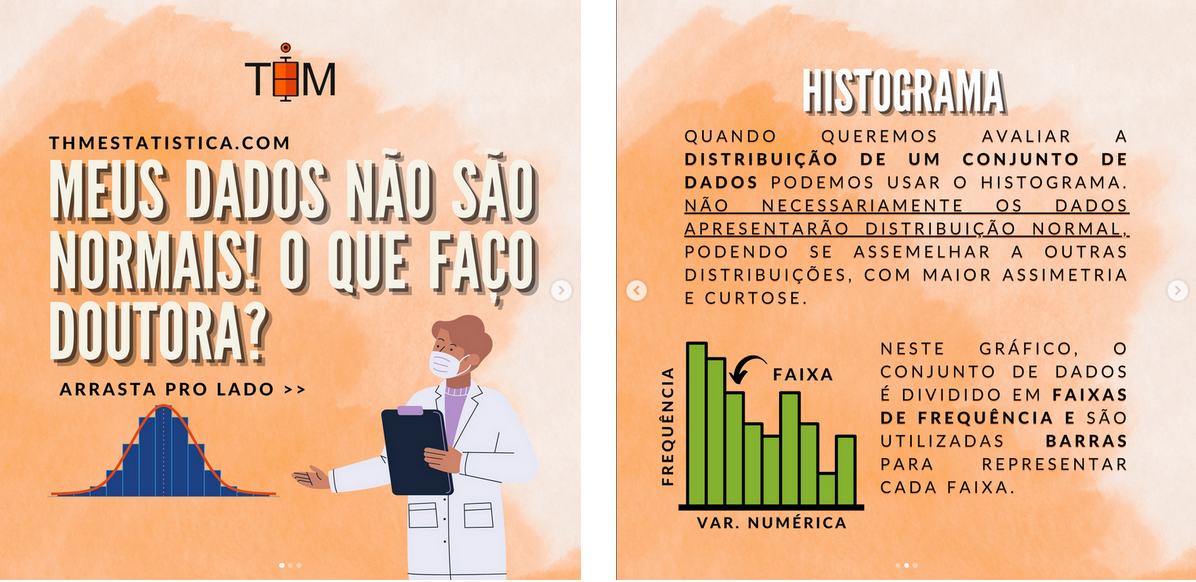

### Usando a biblioteca "plotnine"

Conceitos básicos:
* Criamos um objeto do tipo "plot" -> Nome dele em programação: ggplot()
* Esse objeto tem uma estética própria, onde inserimos o que vai no eixo x, no eixo y -> Nome em programação: aes()
* Aí então, plot criado, vamos para a "geometria" a ser criada. No caso de um histograma temos a geometria com nome geom_histogram.
Mais informações, vale a pena o estudo: https://plotnine.org/gallery/

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 42'. Pick better value with 'binwidth'.


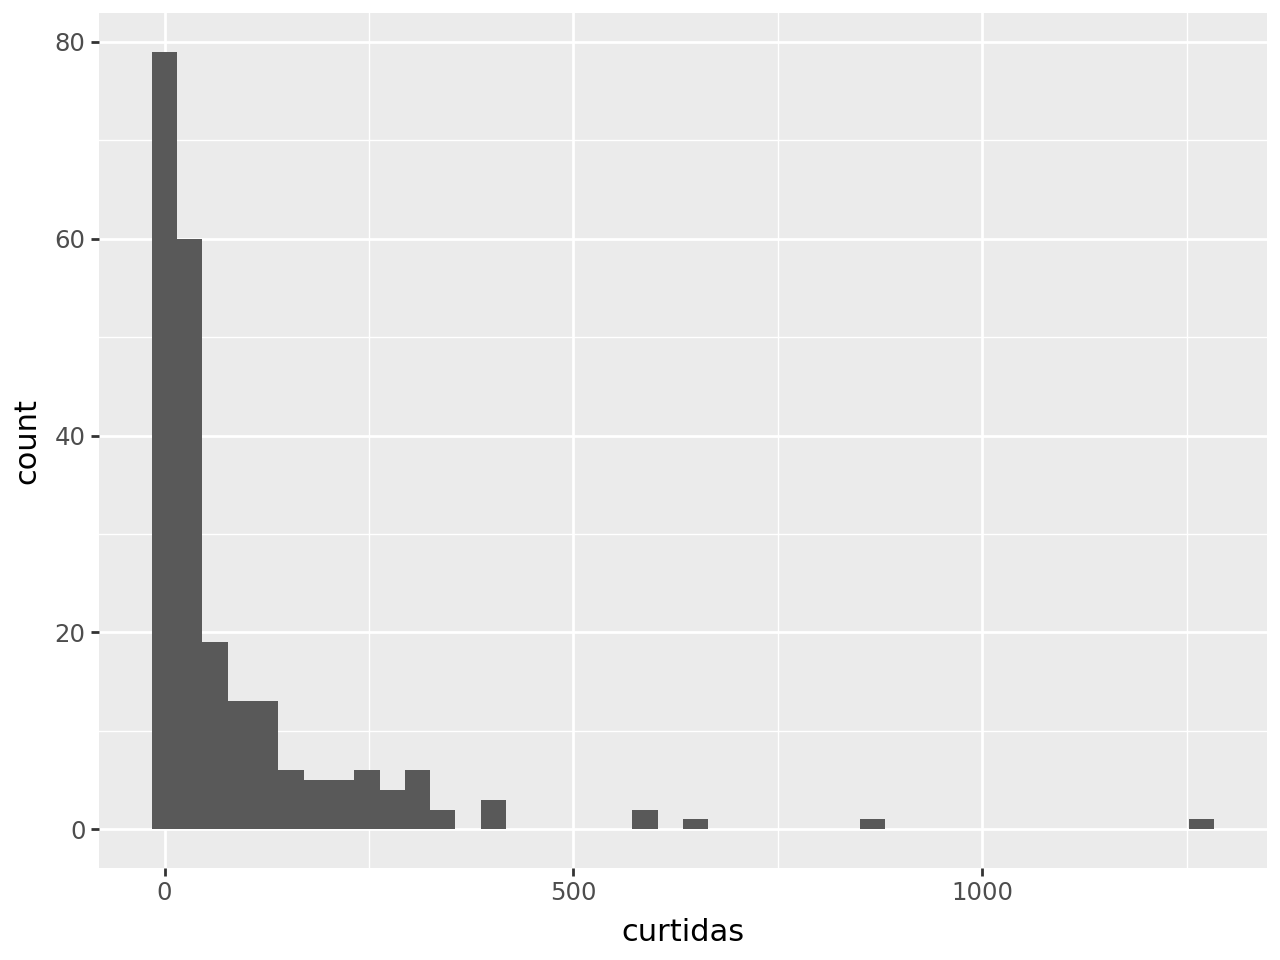

In [27]:
from plotnine import *  # O Plotnine é uma biblioteca que permite executar as funções do Gplot2 no Python.
# Quando utilizamos a sintaxe: from "biblioteca" import *. Estamos importando todas as funções da biblioteca.

ggplot(df_filtrado,aes(x='curtidas'))+geom_histogram()

Agora que estamos só em uma variável, vamos analisar junto do histograma as principais medidas calculadas.

In [37]:
result[['curtidas']].round(0).transpose()

,count,mean,std,min,q25,median,q75,max,amplitude,coeficiente_variacao,desvio_medio
curtidas,226.0,86.0,146.0,0.0,11.0,28.0,104.0,1268.0,1268.0,170.0,91.0


Vamos melhorar o gráfico nesse momento, adicionando cor para as barras (argumento fill dentro da geom_histogram).

Também, vamos mudar o eixo x para escala com marcações em que podemos ver melhor alguns valores.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 42'. Pick better value with 'binwidth'.


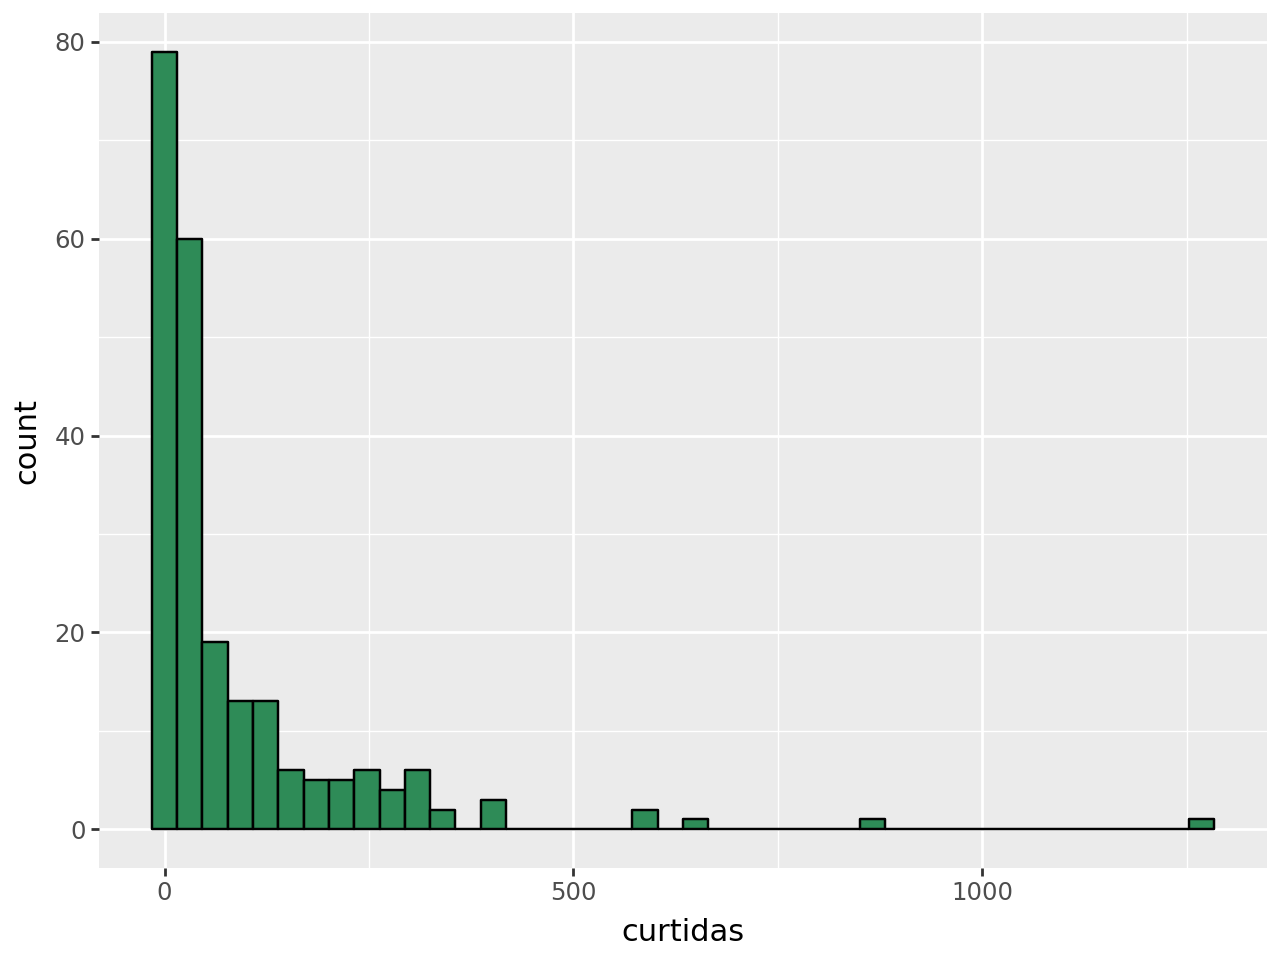

In [29]:
ggplot(df_filtrado,aes(x='curtidas'))+geom_histogram(fill='seagreen',colour='black')

In [38]:
result[['curtidas']].round(0).transpose()

,count,mean,std,min,q25,median,q75,max,amplitude,coeficiente_variacao,desvio_medio
curtidas,226.0,86.0,146.0,0.0,11.0,28.0,104.0,1268.0,1268.0,170.0,91.0


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 42'. Pick better value with 'binwidth'.


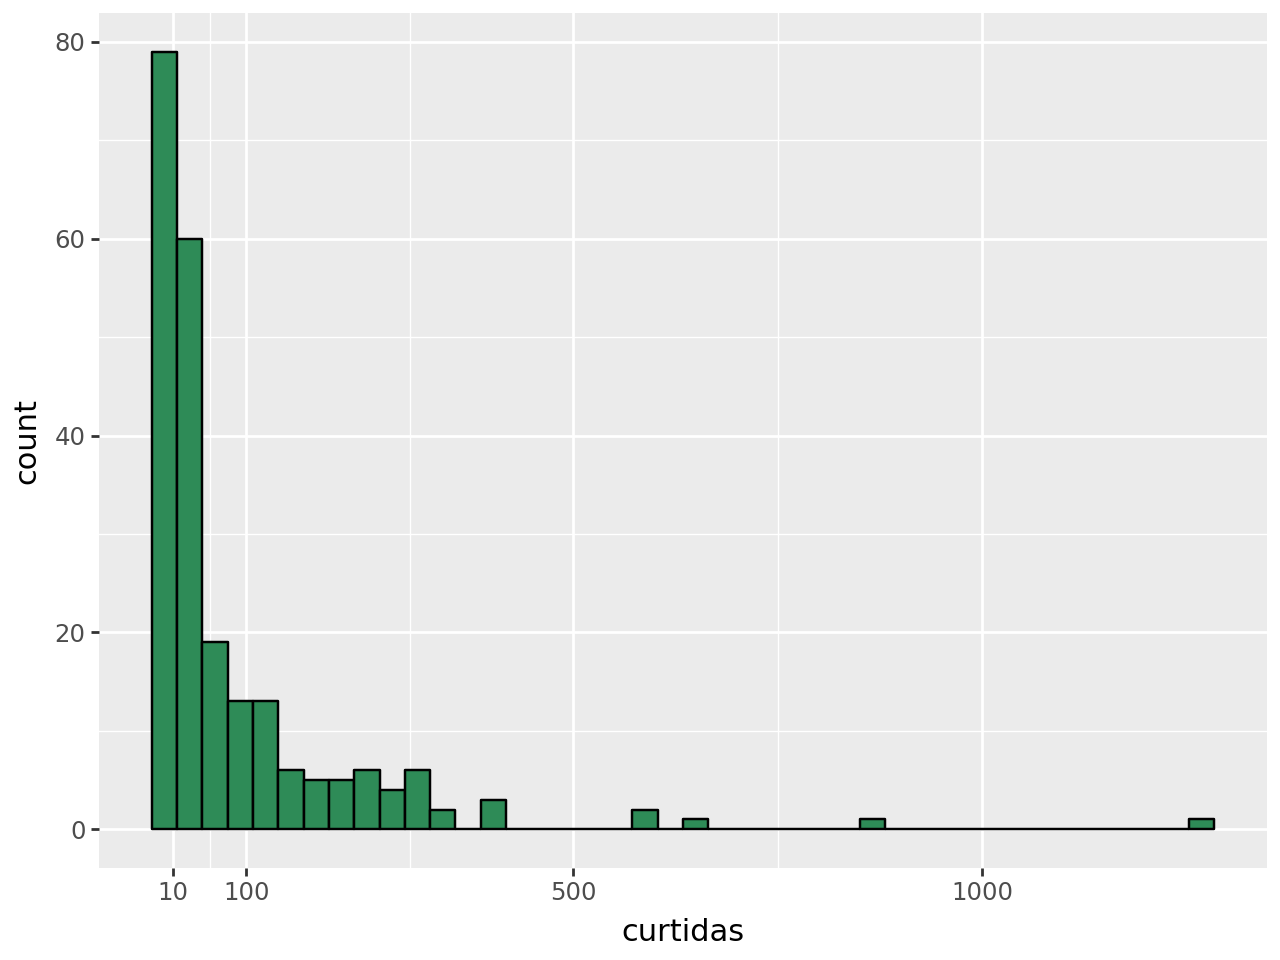

In [40]:
(ggplot(df_filtrado,aes(x='curtidas'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,500,1000]))

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 42'. Pick better value with 'binwidth'.


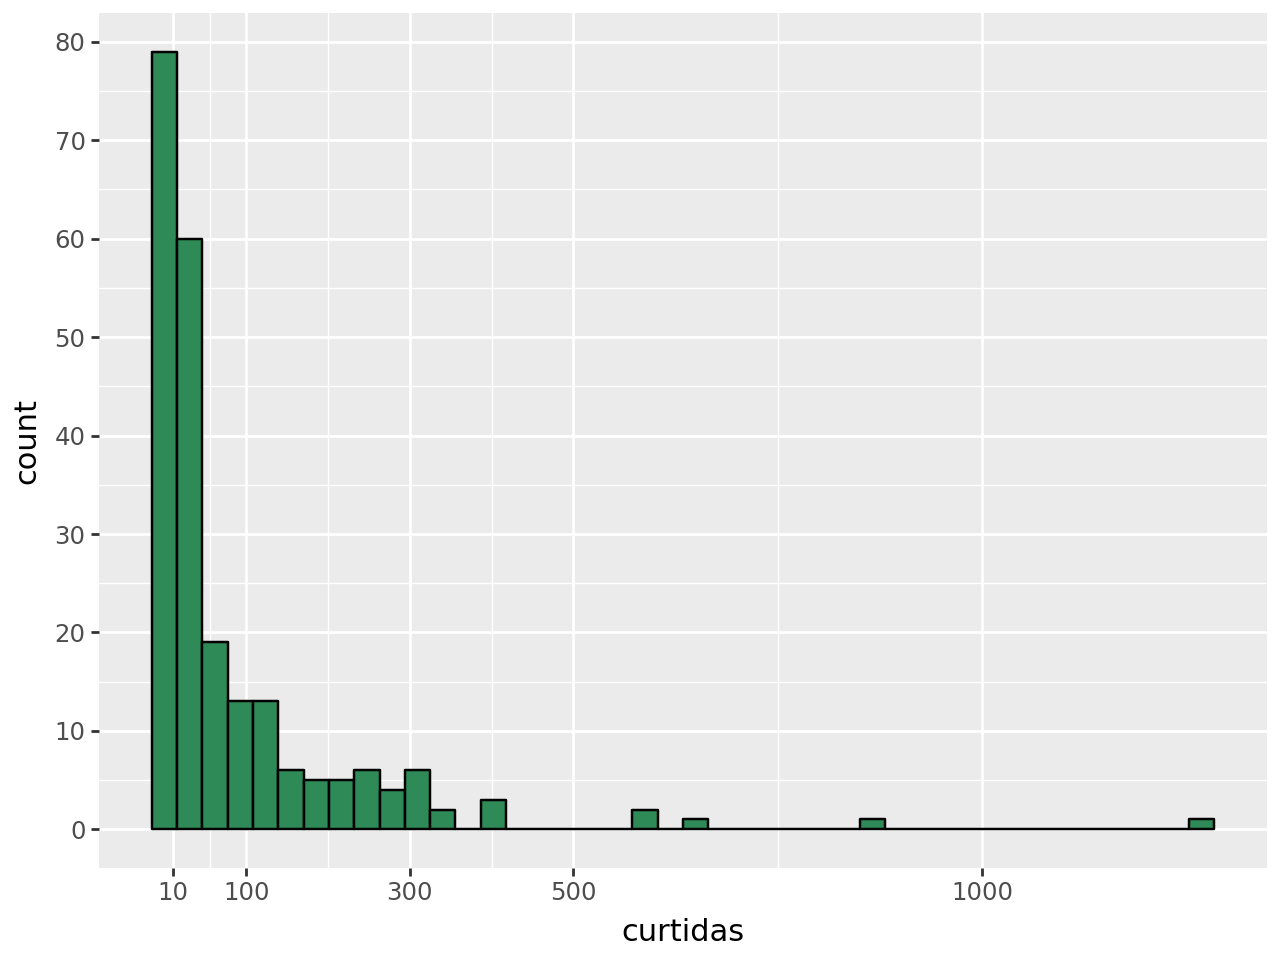

In [49]:
(ggplot(df_filtrado,aes(x='curtidas'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,300,500,1000])+
 scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80]))

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 42'. Pick better value with 'binwidth'.


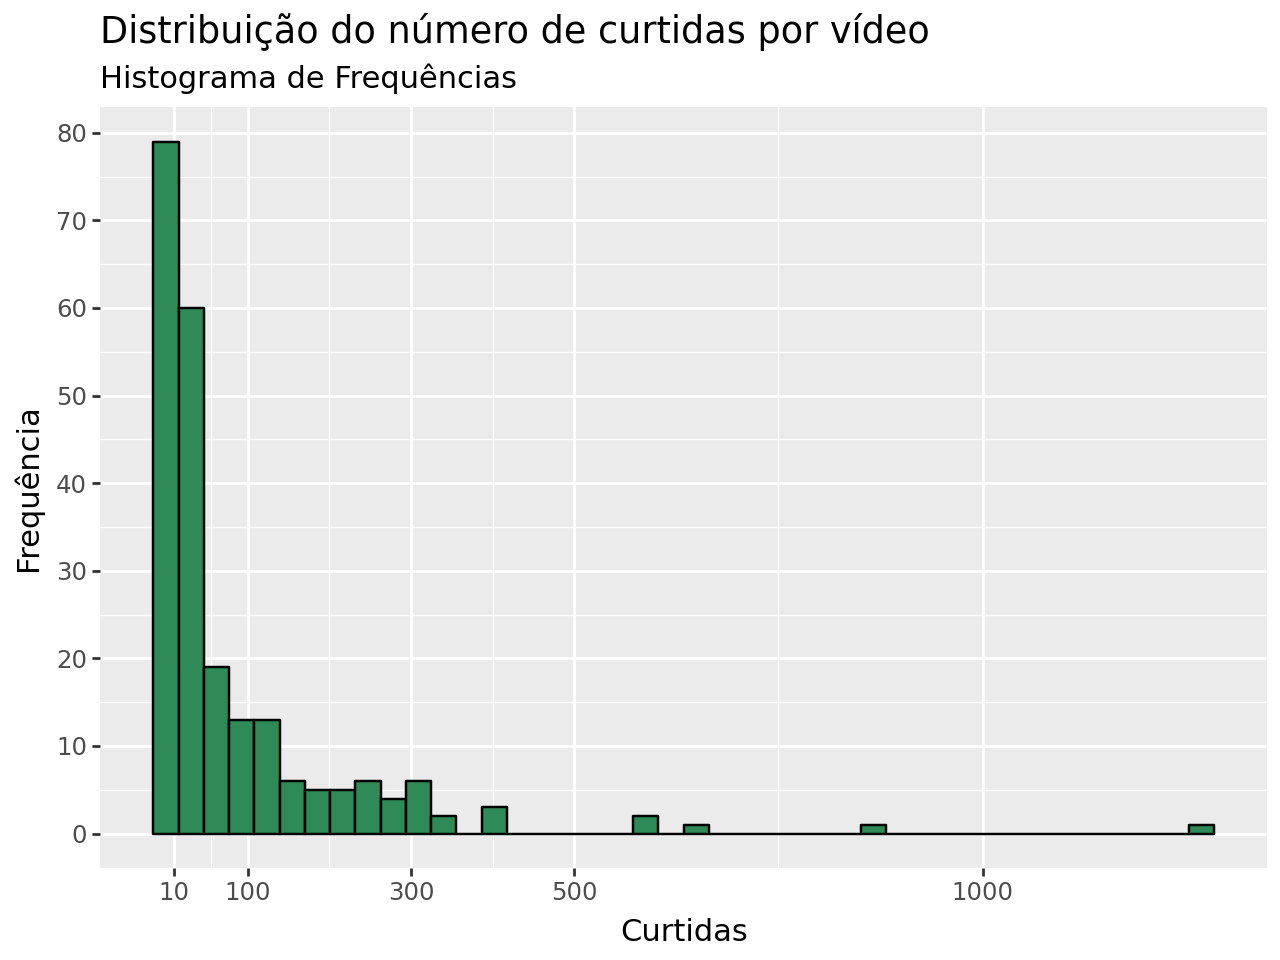

In [48]:
(ggplot(df_filtrado,aes(x='curtidas'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,300,500,1000])+
 scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80])+
 labs(x='Curtidas',y='Frequência',title='Distribuição do número de curtidas por vídeo',subtitle='Histograma de Frequências')
 )

Percebemos que temos alguns poucos vídeos que tem muitas curtidas. A pergunta que surge é: Quais são esses vídeos? Tem alguma característica em comum?

In [50]:
# Filtrando linhas que atendam ao requisito de ter ao menos 300 curtidas
df_filtrado[df_filtrado['curtidas']>=300]

,titulo,curtidas,inscritos,views,tempo_exibicao_h
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918
6,Representações Gráficas II | Estatística Básic...,417,52,5313,469.5044
7,Distribuições Amostrais | Estatística Básica 13,413,77,8961,952.2116
8,Medidas de Posição Central | Estatística Básic...,406,40,5297,696.8978
9,"Probabilidade, Espaço Amostral e Diagrama de V...",333,71,4345,504.8498
10,Boxplot | Estatística Básica 06,329,28,4675,514.3085


Muitos vídeos da playlist de Estatística (podemos ver isso pelo título). Dessa forma, podemos criar uma variável categórica (nominal) chamada "Playlist". Assim poderemos comparar os resultados de curtidas comparando duas categorias diferentes.

In [57]:
# Lembre-se: você pode (e deve) pedir ajuda à IAs para agilizar/facilitar o trabalho. SEMPRE ENTENDENDO O QUE SE PASSA
# Não terceirize seu cérebro.
# prompt: cria um código pra mim que pega a coluna 'titulo' do df e cria uma outra coluna chamada playlist, em que: caso 'titulo" contenha a palavra 'Estatística" a playlist recebe 'Estatística", se houver 'Probabilidade' recebe esse nome e, caso contrário recebe 'Outra".

def define_playlist(titulo):
  
  
    return 'Estatística'
  elif 'Probabilidade' in titulo:
    return 'Probabilidade'
  else:
    return 'Outras'

df_filtrado['playlist'] = df_filtrado['titulo'].apply(define_playlist)
df_filtrado.head()

<ipython-input-57-70c29b80ff01>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,titulo,curtidas,inscritos,views,tempo_exibicao_h,playlist
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966,Estatística
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826,Estatística
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947,Estatística
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803,Estatística
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918,Probabilidade


De posse agora de uma coluna catégorica, podemos ver o resultado das medidas descritivas obtidas anteriormente agrupadas "por playlist".

In [104]:
# Usando aggregate para calcular as estatísticas
result_playlist = df_filtrado.groupby(['playlist']).aggregate({
    'curtidas': ['count', 'mean','std','min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio]
})

print(result_playlist,'\n')
print('\n Resultados após arredondamento (só para exposição) \n')
result_playlist.round(0)

              curtidas                                                        \
                 count        mean         std min    q1 median     q3   max   
playlist                                                                       
Estatística         71  153.746479  215.949248   0  13.5   68.0  222.0  1268   
Outras              56   14.160714   14.645852   0   3.0   10.0   23.0    66   
Probabilidade       99   77.828283   95.190790   3  17.0   35.0  109.5   584   

                                                           
              amplitude coeficiente_variacao desvio_medio  
playlist                                                   
Estatística        1268           140.458012   146.847451  
Outras               66           103.425939    11.456633  
Probabilidade       581           122.308738    68.882155   


 Resultados após arredondamento (só para exposição) 



curtidas                                                        \
                 count   mean    std min    q1 median     q3   max amplitude   
playlist                                                                       
Estatística         71  154.0  216.0   0  14.0   68.0  222.0  1268      1268   
Outras              56   14.0   15.0   0   3.0   10.0   23.0    66        66   
Probabilidade       99   78.0   95.0   3  17.0   35.0  110.0   584       581   

                                                 
              coeficiente_variacao desvio_medio  
playlist                                         
Estatística                  140.0        147.0  
Outras                       103.0         11.0  
Probabilidade                122.0         69.0

Daqui da tabela descritiva podemos obter alguns *insigths* interessantes:


*   A quantidade média de curtidas é maior para Estatística e Probabilidade em comparação com outras playlists.
*   Em "Outras" a média é mais próxima da mediana, sugerindo que o desempenho dos vídeos de outras playlists não contém vídeos virais.
*   Este é um ótimo exemplo para reparar no uso do desvio padrão em comparação com Coeficiente de Variação.
*   Nesse exemplo podemos usar o Desvio Médio para comparar a dispersão dos três grupos, por exemplo: percebe-se que a dispersão do número de curtidas da playlist de Probabilidade é quase 7 vezes maior que da playlist "Outras" e é, aproximadamente, metade da dispersão da playlist de Estatística.
* Isso sugere que a playlist de Estatística contém um engajamento menos previsível (varia de ruim à excelente), enquanto a playlist "Outras", por mais que tenha menos desempenho (menos curtidas no geral), é mais previsível/homogênea.

Vamos aliar a interpretação da tabela com um gráfico de boxplots.



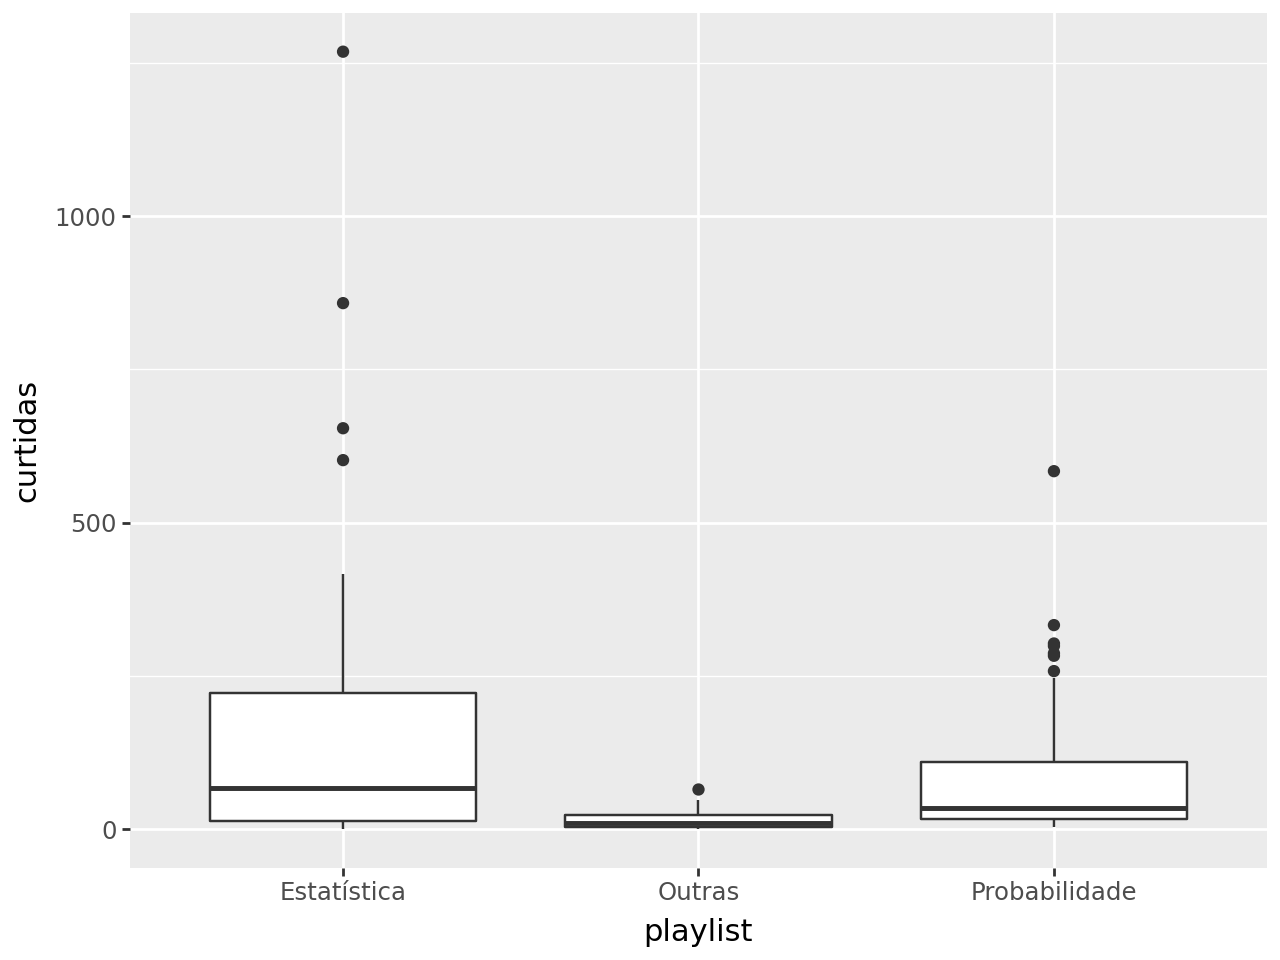

In [60]:
# Criando o boxplot (como já visto anteriormente)
(ggplot(df_filtrado,aes(x='playlist',y='curtidas'))+
 geom_boxplot()
)

Problemas com a visualização no eixo y?
Vamos testar (e ver se funciona) uma escala diferente. Por exemplo, logarítmica.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 14 rows containing non-finite values.


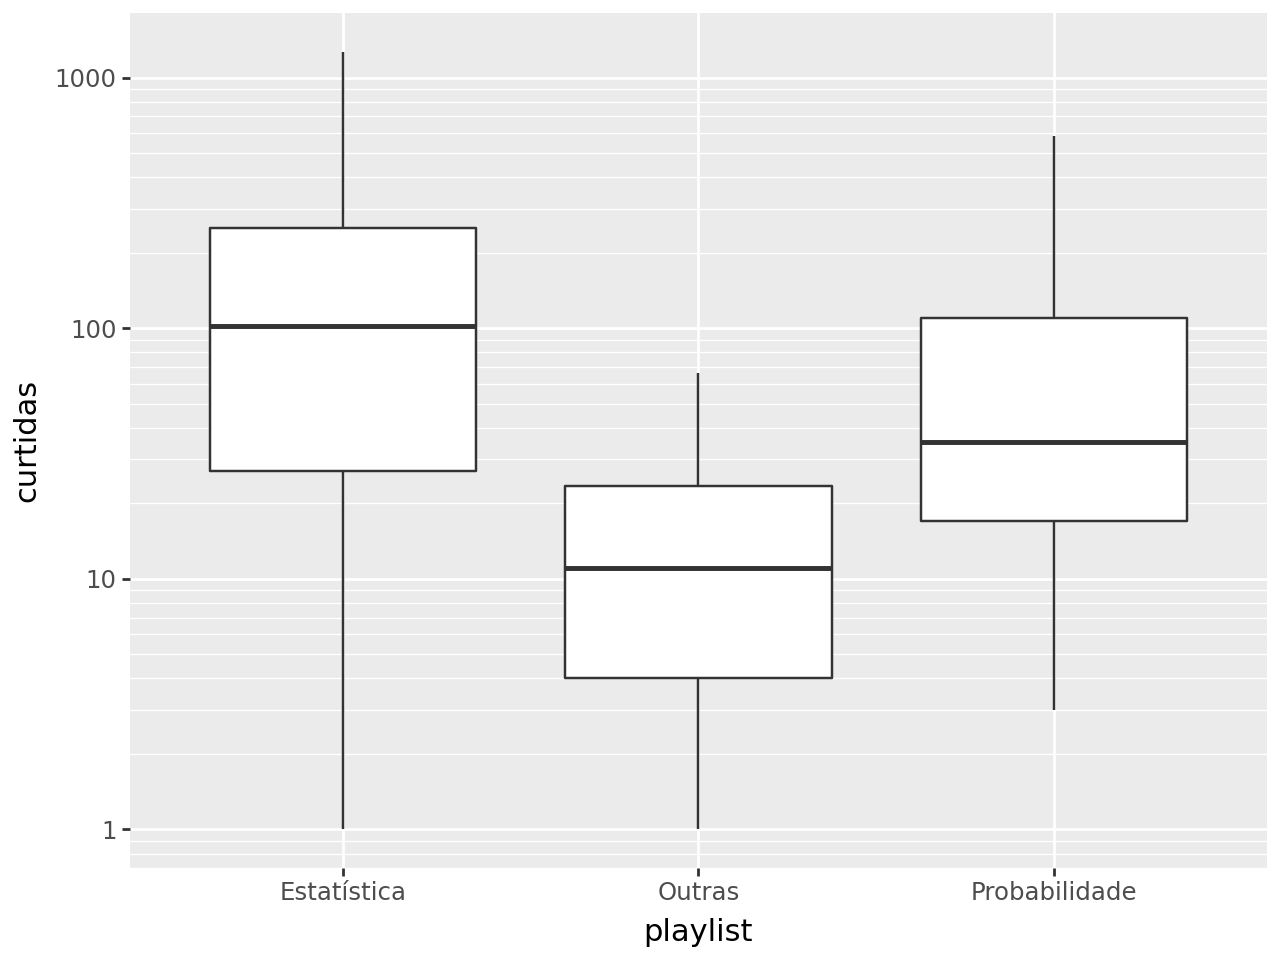

In [61]:
# Criando o boxplot (como já visto anteriormente)
(ggplot(df_filtrado,aes(x='playlist',y='curtidas'))+
 geom_boxplot()+
 scale_y_log10()
)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 14 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


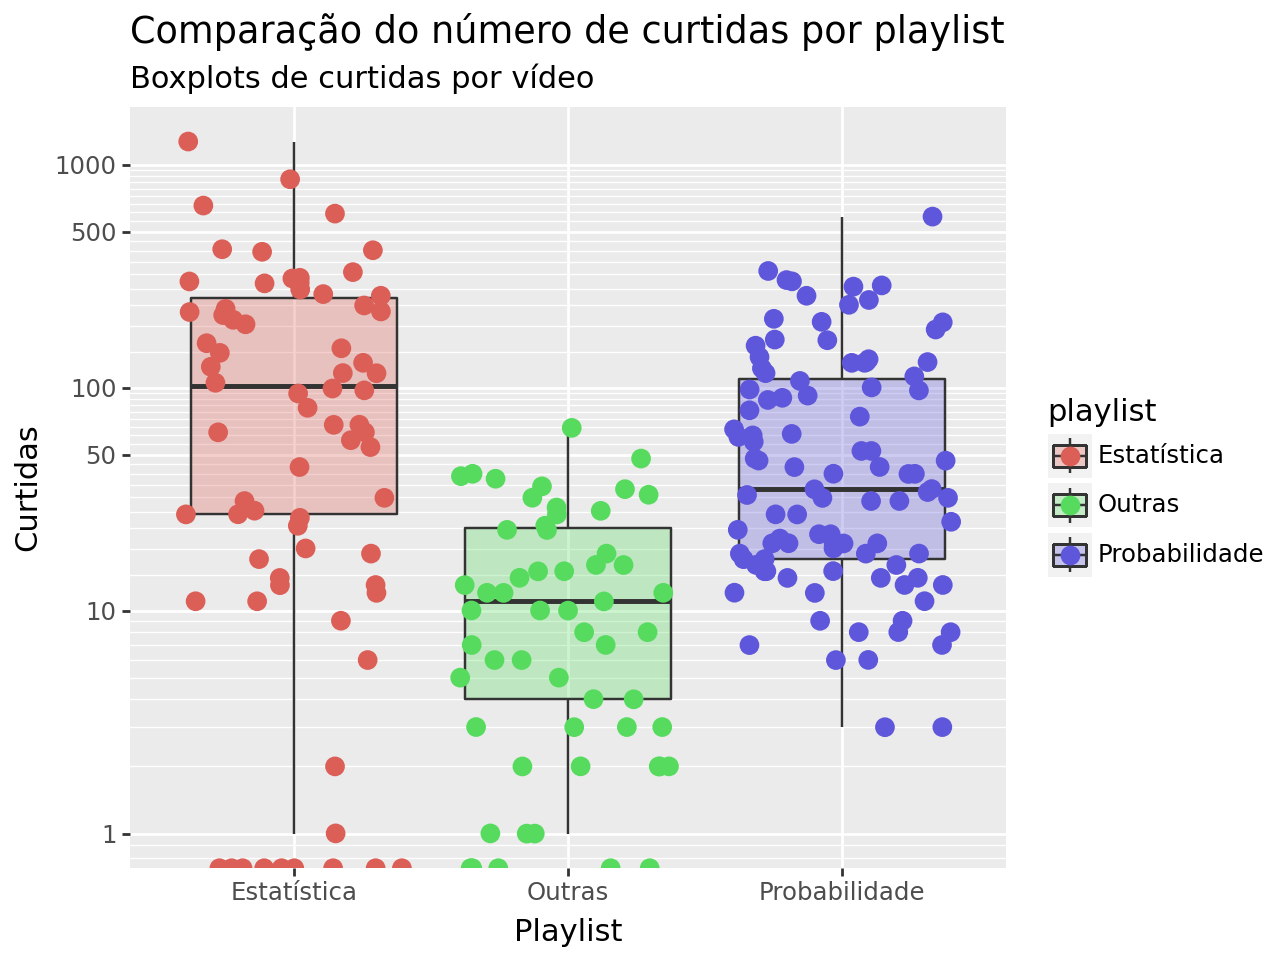

In [84]:
# Criando o boxplot (como já visto anteriormente)
(ggplot(df_filtrado,aes(x='playlist',y='curtidas'))+
 geom_boxplot(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0,1,10,50,100,500,1000])+
 labs(x='Playlist',y='Curtidas',title='Comparação do número de curtidas por playlist',subtitle='Boxplots de curtidas por vídeo')
)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 14 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


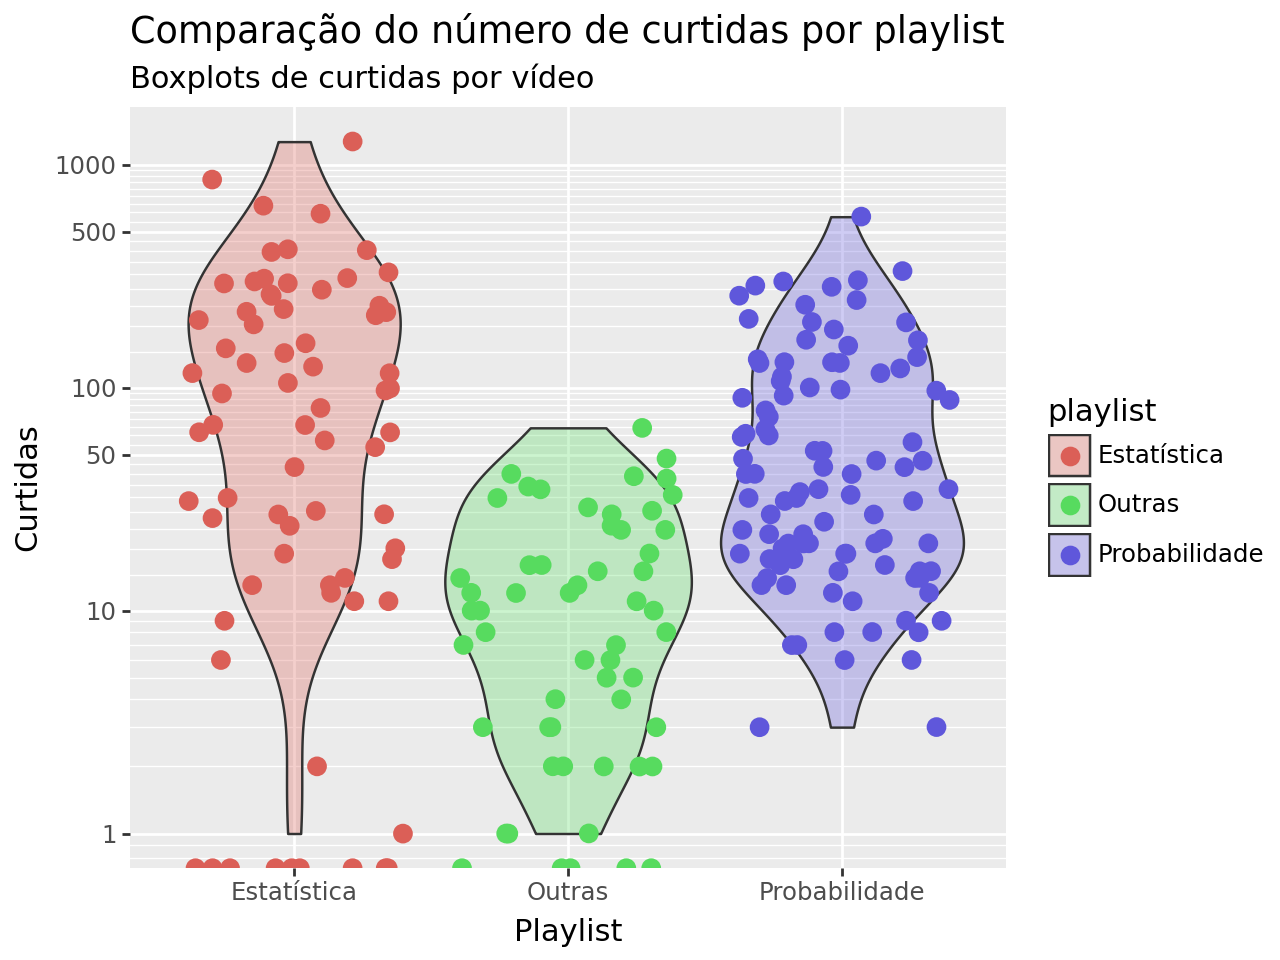

In [89]:
# Criando o boxplot (como já visto anteriormente)
(ggplot(df_filtrado,aes(x='playlist',y='curtidas'))+
 geom_violin(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0,1,10,50,100,500,1000])+
 labs(x='Playlist',y='Curtidas',title='Comparação do número de curtidas por playlist',subtitle='Boxplots de curtidas por vídeo')
)

Que conclusões **parciais** podemos tirar até o momento sobre a relação das curtidas e o conteúdo?

Sugestão: imagine que fizemos toda essa análise exploratória até o momento e vamos redigir uma análise SÓ A PARTIR DAQUI num relatório.

### Análise de Curtidas

A partir dos dados obtidos, uma análise da distribuição dos valores de curtida por vídeo foi feita associada ao cálculo de medidas descritivas para essa variável.

A Figura 1 apresenta o histograma de frequências do número de curtidas enquanto a Tabela 1 apresenta as principais medidas descritivas (tanto centrais quanto de dispersão).

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 42'. Pick better value with 'binwidth'.


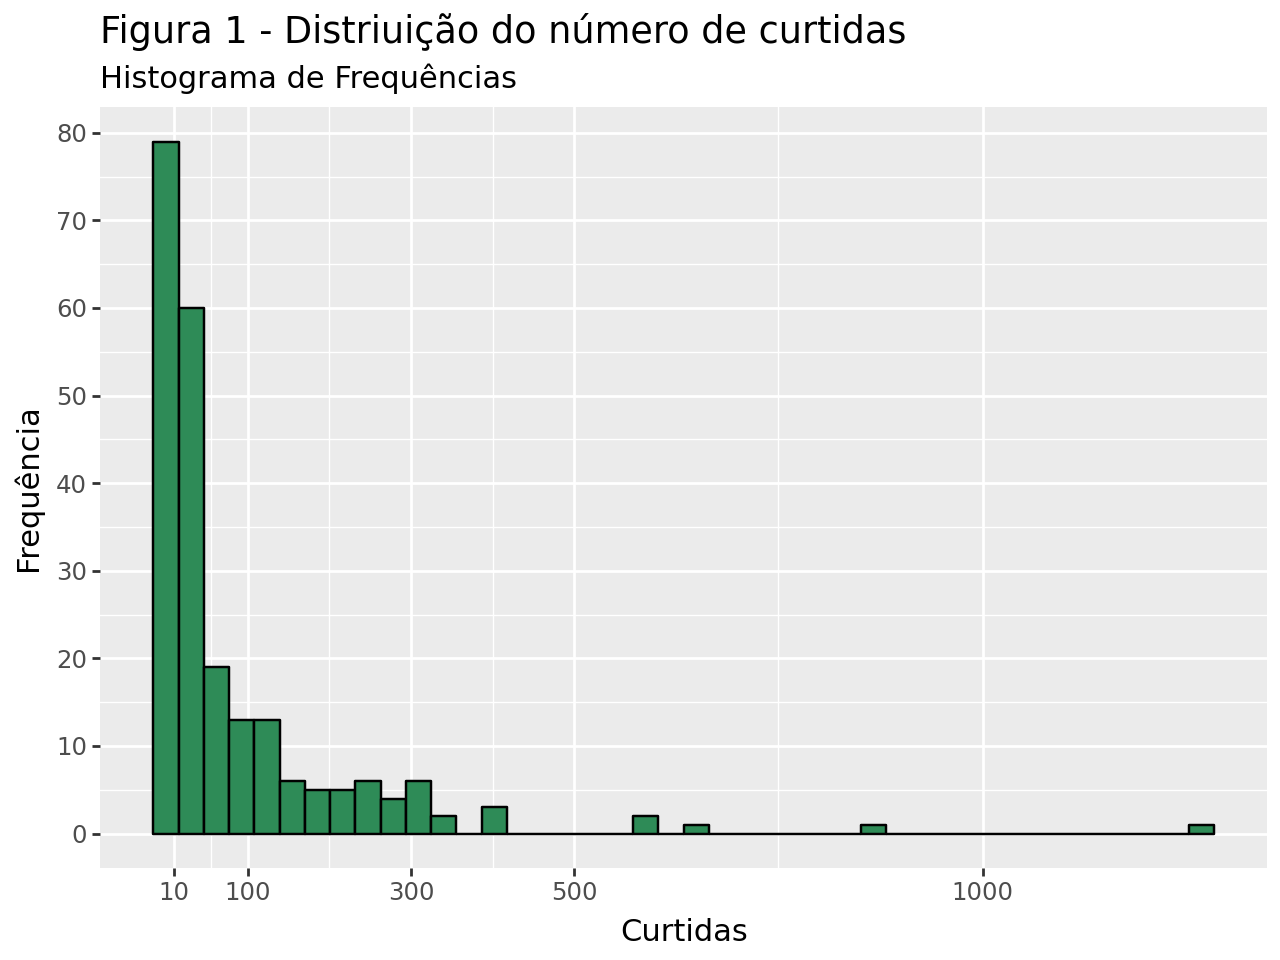

In [92]:
(ggplot(df_filtrado,aes(x='curtidas'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,300,500,1000])+
 scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80])+
 labs(x='Curtidas',y='Frequência',title='Figura 1 - Distriuição do número de curtidas',
      subtitle='Histograma de Frequências')
 )

In [100]:
result[['curtidas']].round(0).transpose()

,count,mean,std,min,q25,median,q75,max,amplitude,coeficiente_variacao,desvio_medio
curtidas,226.0,86.0,146.0,0.0,11.0,28.0,104.0,1268.0,1268.0,170.0,91.0


Chama atenção, num primeiro momento a quantidade baixa de vídeos acima de 300 curtidas. Esses vídeos, num primeiro momento podem ser tratados como vídeos "virais".

A partir desse tipo de verificação, gostaria de se entender quais são esses vídeos. Para isso um filtro foi feito, retornando os resultados presentes na Tabela 2.

Tabela 2 - Vídeos com mais de 300 curtidas

In [ ]:
# Filtrando linhas que atendam ao requisito de ter ao menos 300 curtidas
df_filtrado[df_filtrado['curtidas']>=300]

,titulo,curtidas,inscritos,views,tempo_exibicao_h
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918
6,Representações Gráficas II | Estatística Básic...,417,52,5313,469.5044
7,Distribuições Amostrais | Estatística Básica 13,413,77,8961,952.2116
8,Medidas de Posição Central | Estatística Básic...,406,40,5297,696.8978
9,"Probabilidade, Espaço Amostral e Diagrama de V...",333,71,4345,504.8498
10,Boxplot | Estatística Básica 06,329,28,4675,514.3085


A partir da observação dos vídeos com mais curtidas foi possível entender que o título dos vídeos contém uma informação importante para o conteúdo: a playlist.

Dessa forma, os vídeos foram categorizados na variável "playlist" de acordo com as seguintes opções: "Estatística", "Probabilidade" e "Outras". A partir da criação dessa variável, as medidas descritivas foram então recalculadas, analisando cada grupo separadamente (Tabela 3).

Tabela 3 - Medidas descritivas para o número de curtidas por playlist

In [102]:
result_playlist.round(0)

curtidas                                                        \
                 count   mean    std min   q25 median    q75   max amplitude   
playlist                                                                       
Estatística         71  154.0  216.0   0  14.0   68.0  222.0  1268      1268   
Outras              56   14.0   15.0   0   3.0   10.0   23.0    66        66   
Probabilidade       99   78.0   95.0   3  17.0   35.0  110.0   584       581   

                                                 
              coeficiente_variacao desvio_medio  
playlist                                         
Estatística                  140.0        147.0  
Outras                       103.0         11.0  
Probabilidade                122.0         69.0

É possível observar que a playlist de Estatística possui maior número de curtidas, tanto no geral (medidas centrais), nos quartis e nos valores máximos. Também é dessa playlist os maiores valores de dispersão (observados tanto via coeficiente de variação quanto em termos de desvio médio).

Para melhor entender os resultados, gráficos de boxplot por playlist foram criados e expostos, conforme indicado na Figura 2.

Figura 2 - Comparação do número de curtidas por playlist

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 14 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


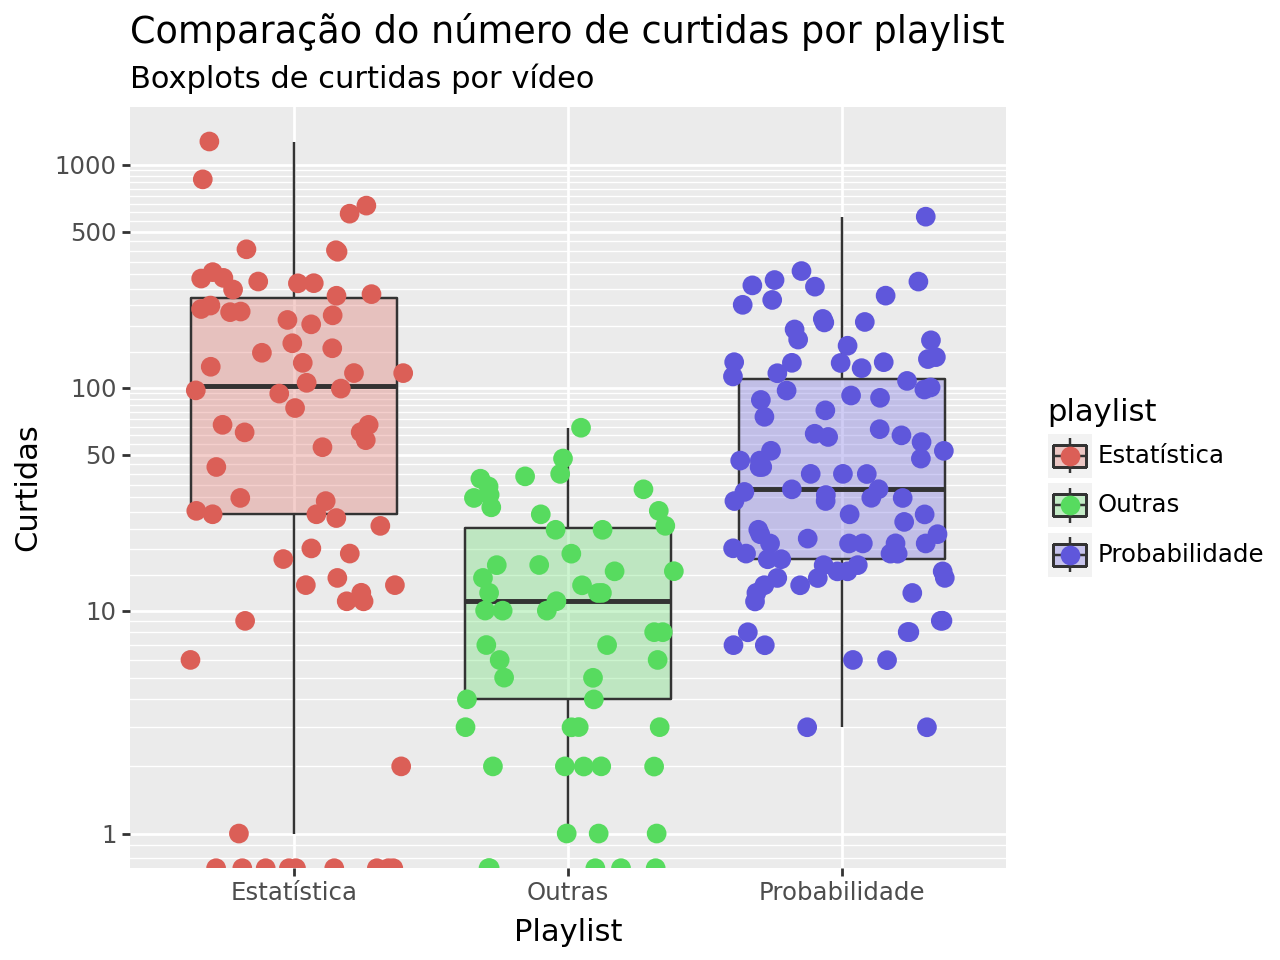

In [91]:
# Criando o boxplot (como já visto anteriormente)
(ggplot(df_filtrado,aes(x='playlist',y='curtidas'))+
 geom_boxplot(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0,1,10,50,100,500,1000])+
 labs(x='Playlist',y='Curtidas',title='Comparação do número de curtidas por playlist',subtitle='Boxplots de curtidas por vídeo')
)

### Lição de casa: Pegar outra variável do dataset e fazer análise individual dela.

Caso precise revisar alguma matéria:

[Material de Referência - Vídeos 1 a 10 ](https://youtube.com/playlist?list=PL_x1uklxUt2OFdte3zMQFsR-F0IhRN1Ut&si=NAiD_SGDhknVwCeX)